In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


592

In [3]:
#url for API calls, Units:Imperial
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = f"{url}appid={weather_api_key}&units=imperial&q="

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=b4e5478e56e0beb741dc426b2df815b9&units=imperial&q=


In [4]:
#Lists to store all values:
city = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

In [5]:

print("Beginning Data Retrieval")
print("-----------------------------")


city_count = 0 
set_count = 1

for search in cities:
    query = query_url + search
    response = requests.get(query)
    response_json = response.json()
    
    #print(response_json)
    
    try:
        city_count += 1
        city.append(response_json["name"])
        lat.append(response_json["coord"]["lat"])
        lng.append(response_json["coord"]["lon"])
        temp.append(response_json["main"]["temp_max"])
        humidity.append(response_json["main"]["humidity"])
        cloudiness.append(response_json["clouds"]["all"])
        wind_speed.append(response_json["wind"]["speed"])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
        
        print(f"Processing Record {city_count} of Set {set_count}| {search} ")


    except KeyError: 
        print("City not found. Skipping...")
    
 
    if city_count > 50: 
        set_count +=1
        city_count = 0 
        time.sleep(5)   


print("-----------------------------")
print("Data Retrieval Complete")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1| barrow 
Processing Record 2 of Set 1| mitsamiouli 
Processing Record 3 of Set 1| westport 
Processing Record 4 of Set 1| iqaluit 
Processing Record 5 of Set 1| alice springs 
Processing Record 6 of Set 1| changji 
Processing Record 7 of Set 1| tasiilaq 
Processing Record 8 of Set 1| moussoro 
City not found. Skipping...
Processing Record 10 of Set 1| havoysund 
Processing Record 11 of Set 1| najran 
City not found. Skipping...
Processing Record 13 of Set 1| bambous virieux 
Processing Record 14 of Set 1| ushuaia 
City not found. Skipping...
Processing Record 16 of Set 1| carnarvon 
Processing Record 17 of Set 1| rikitea 
Processing Record 18 of Set 1| zhangye 
Processing Record 19 of Set 1| darhan 
Processing Record 20 of Set 1| arraial do cabo 
Processing Record 21 of Set 1| hobart 
Processing Record 22 of Set 1| bluff 
Processing Record 23 of Set 1| jamestown 
Processing Record 24 of Set 1| russell 


Processing Record 1 of Set 5| buala 
Processing Record 2 of Set 5| nouadhibou 
Processing Record 3 of Set 5| adrar 
Processing Record 4 of Set 5| ribeira grande 
Processing Record 5 of Set 5| sumenep 
Processing Record 6 of Set 5| chumikan 
Processing Record 7 of Set 5| evensk 
Processing Record 8 of Set 5| touros 
Processing Record 9 of Set 5| los llanos de aridane 
Processing Record 10 of Set 5| mayor pablo lagerenza 
Processing Record 11 of Set 5| srednekolymsk 
Processing Record 12 of Set 5| boras 
Processing Record 13 of Set 5| kungurtug 
Processing Record 14 of Set 5| ahipara 
Processing Record 15 of Set 5| tarko-sale 
Processing Record 16 of Set 5| tigil 
Processing Record 17 of Set 5| severo-kurilsk 
Processing Record 18 of Set 5| nemuro 
Processing Record 19 of Set 5| lovozero 
Processing Record 20 of Set 5| beloha 
Processing Record 21 of Set 5| mocuba 
Processing Record 22 of Set 5| coquimbo 
Processing Record 23 of Set 5| saldanha 
City not found. Skipping...
Processing Rec

Processing Record 1 of Set 9| olinda 
Processing Record 2 of Set 9| bay roberts 
Processing Record 3 of Set 9| yambio 
Processing Record 4 of Set 9| montrose 
Processing Record 5 of Set 9| kalmunai 
Processing Record 6 of Set 9| conde 
Processing Record 7 of Set 9| awallan 
Processing Record 8 of Set 9| casas grandes 
Processing Record 9 of Set 9| inhambane 
Processing Record 10 of Set 9| rivadavia 
Processing Record 11 of Set 9| haines junction 
City not found. Skipping...
Processing Record 13 of Set 9| hualmay 
Processing Record 14 of Set 9| terney 
Processing Record 15 of Set 9| victoria 
Processing Record 16 of Set 9| mecca 
Processing Record 17 of Set 9| rochester 
Processing Record 18 of Set 9| mae sai 
Processing Record 19 of Set 9| bonthe 
Processing Record 20 of Set 9| elbistan 
Processing Record 21 of Set 9| mikkeli 
Processing Record 22 of Set 9| zapolyarnyy 
Processing Record 23 of Set 9| amlimay 
Processing Record 24 of Set 9| puerto colombia 
Processing Record 25 of Set 9

In [9]:
#Weather DF

weather_df = pd.DataFrame({"City": city,
                          "Latitiude": lat,
                          "Longitude": lng,
                          "Max Temperature (F)": temp,
                          "Humidity": humidity,
                            "Cloudiness": cloudiness,
                            "Wind Speed": wind_speed,
                            "Country": country, 
                            "Date": date})
weather_df.head()


,City,Latitiude,Longitude,Max Temperature (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,19.40,79,90,9.22,US,1619556025
1,Mitsamiouli,-11.3847,43.2844,81.03,76,21,8.37,KM,1619556106
2,Westport,41.1415,-73.3579,63.00,41,1,12.66,US,1619556106
3,Iqaluit,63.7506,-68.5145,24.80,63,20,3.44,CA,1619556107
4,Alice Springs,-23.7000,133.8833,44.60,65,0,5.75,AU,1619556107


In [16]:
#Export DF
weather_df.to_csv("output/weather_df.csv", index=False, header=True)

In [18]:
weather_df.describe()

,Latitiude,Longitude,Max Temperature (F),Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,21.982437,17.445708,60.141679,69.138686,54.700730,7.422500,1.619556e+09
std,32.876648,92.190191,20.598259,23.591878,38.035654,4.931752,1.326503e+02
min,-54.800000,-179.166700,1.380000,6.000000,0.000000,0.650000,1.619556e+09
25%,-6.908575,-64.274050,43.457500,54.000000,20.000000,3.440000,1.619556e+09
50%,27.746800,27.081650,63.590000,77.000000,65.000000,6.120000,1.619556e+09
75%,49.071350,93.487500,77.167500,87.000000,90.250000,10.360000,1.619556e+09
max,78.218600,179.316700,96.850000,100.000000,100.000000,31.000000,1.619556e+09


The next graph shows the relationship between latitude and the maximum temperature recorded.
This shows that the closer to the equator, the higher the temperature


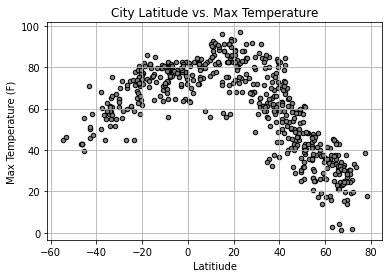

In [38]:
#Max humidity is 100 -> OK
#Plotting the data:

#City Latitude vs. Max Temperature
weather_df.plot(kind='scatter', x = 'Latitiude', y = 'Max Temperature (F)',
               color = 'grey', edgecolors = "black")
plt.grid()
plt.title("City Latitude vs. Max Temperature")
print("The next graph shows the relationship between latitude and the maximum temperature recorded.")
print("This shows that the closer to the equator, the higher the temperature")

This plot shows the latitud vs humidity relation, this seems to have no correlation at all


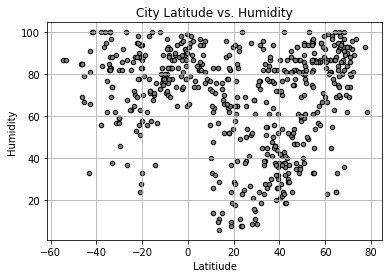

In [41]:
#City Latitude vs. Humidity
weather_df.plot(kind='scatter', x = 'Latitiude', y = 'Humidity',
               color = 'grey', edgecolors = "black")
plt.grid()
plt.title("City Latitude vs. Humidity")
print("This plot shows the latitud vs humidity relation, this seems to have no correlation at all")

This plot is showing latitude vs. cloudiness relation, this also seems to have no correlation between them


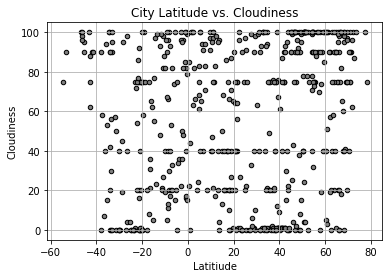

In [43]:
#City Latitude vs. Cloudiness
weather_df.plot(kind='scatter', x = 'Latitiude', y = 'Cloudiness',
               color = 'grey', edgecolors = "black")
plt.grid()
plt.title("City Latitude vs. Cloudiness")
print("This plot is showing latitude vs. cloudiness relation, this also seems to have no correlation between them")

This plot is showing the relaton between latitude and wind speed and the correlation is also negligible


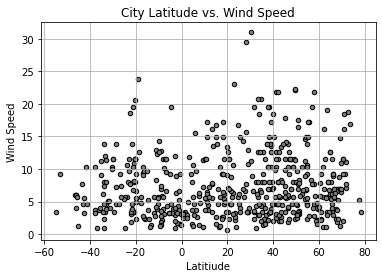

In [45]:
#City Latitude vs. Wind Speed
weather_df.plot(kind='scatter', x = 'Latitiude', y = 'Wind Speed',
               color = 'grey', edgecolors = "black")
plt.grid()
plt.title("City Latitude vs. Wind Speed")
print("This plot is showing the relaton between latitude and wind speed and the correlation is also negligible")

# Linear Regression